In [ ]:
#Questions:
#1) Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.
#2)  What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.
#3) Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.
#4) Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.
#5)  What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.
#6) Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the 
# average popularity for each artist.
#7) For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.
#8) Visualize relationships between multiple numerical variables simultaneously using a pair plot.
#9) Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.
#10)  How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [9]:
#load the dataset
df = pd.read_csv(r"C:\Users\ANIL CHOUDHARY\Desktop\pw skill\EDA_4\spotify.csv")

In [10]:
# Display the first few rows of the DataFrame
print(df.head())
df.head() #will show here 5 rows of the DataFrame

  Artist                               Track Name  Popularity  Duration (ms)  \
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191   
1  Drake                                One Dance          91         173986   
2  Drake                       IDGAF (feat. Yeat)          90         260111   
3  Drake     First Person Shooter (feat. J. Cole)          88         247444   
4  Drake            Jimmy Cooks (feat. 21 Savage)          88         218364   

                 Track ID  
0  1yeB8MUNeLo9Ek1UEpsyz6  
1  1zi7xx7UVEFkmKfv06H8x0  
2  2YSzYUF3jWqb9YP9VXmpjE  
3  7aqfrAY2p9BUSiupwk3svU  
4  3F5CgOj3wFlRv51JsHbxhe  


,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [11]:
# Display the summary statistics of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [15]:
#Q1) Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful

df.isnull().sum()  # Check for missing values in each column
# Display the number of unique values in each column

#check dublicate
duplicate_rows = df.duplicated().sum()
if duplicate_rows > 0:
    print(f"Duplicate rows found: {duplicate_rows}")
    df = df.drop_duplicates()  # Remove duplicate rows

#remove dublicate rows
else:
    print("No duplicate rows found.")
    # Display the number of unique values in each column
    print("Number of unique values in each column:")
    print(df.nunique())
    

No duplicate rows found.
Number of unique values in each column:
Artist           115
Track Name       412
Popularity        51
Duration (ms)    410
Track ID         413
dtype: int64


In [13]:
df.describe()

,Popularity,Duration (ms)
count,440.000000,440.000000
mean,75.736364,206810.040909
std,9.886534,53576.930289
min,29.000000,81666.000000
25%,70.000000,172778.500000
50%,77.000000,201866.000000
75%,83.000000,235119.750000
max,97.000000,501648.000000


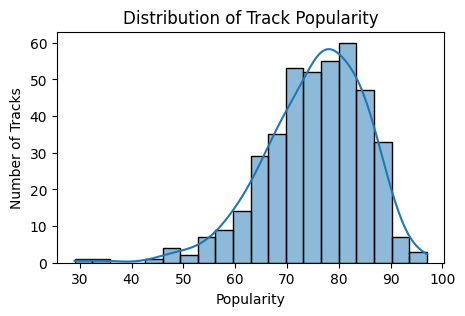

In [17]:
#Q2) What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.
plt.figure(figsize=(5, 3))
sns.histplot(df['Popularity'], bins=20, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.show()

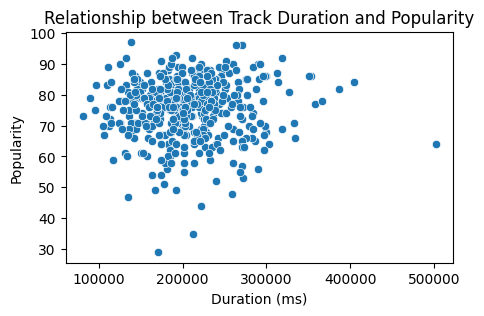

In [19]:
#Q3) Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df, x='Duration (ms)', y='Popularity')
plt.title('Relationship between Track Duration and Popularity')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

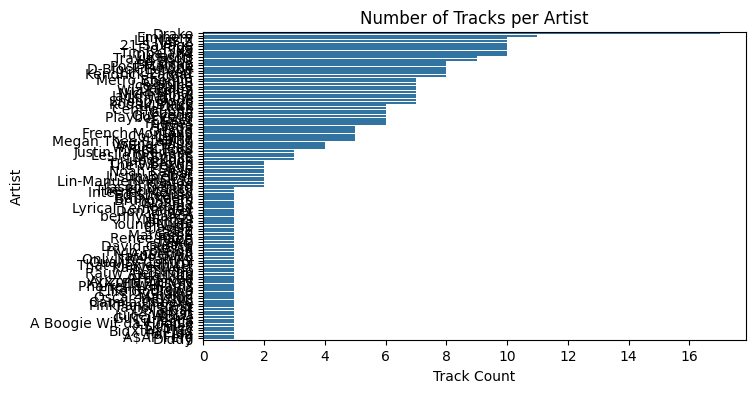

Artist with the highest number of tracks: Drake (17 tracks)


In [21]:
#Q4) hich artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot
# Count the number of tracks for each artist
plt.figure(figsize=(7, 4))
sns.countplot(data=df, y='Artist', order=df['Artist'].value_counts().index)
plt.title('Number of Tracks per Artist')
plt.xlabel('Track Count')
plt.ylabel('Artist')
plt.show()

# Display the artist with the highest number of tracks
top_artist = df['Artist'].value_counts().idxmax()
top_count = df['Artist'].value_counts().max()
print(f"Artist with the highest number of tracks: {top_artist} ({top_count} tracks)")

In [22]:
# Q5) Top 5 least popular tracks with artist and track name
least_popular_tracks = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print(least_popular_tracks)

             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [23]:
# Q6) Among the top 5 most popular artists, which artist has the highest popularity on average?

# Get the top 5 most popular artists by total popularity
top5_artists = df.groupby('Artist')['Popularity'].sum().nlargest(5).index

# Calculate average popularity for each of these artists
avg_popularity = df[df['Artist'].isin(top5_artists)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

print("Average popularity for each of the top 5 most popular artists:")
print(avg_popularity)

# Display the artist with the highest average popularity
top_avg_artist = avg_popularity.idxmax()
top_avg_value = avg_popularity.max()
print(f"\nArtist with the highest average popularity: {top_avg_artist} ({top_avg_value:.2f})")

Average popularity for each of the top 5 most popular artists:
Artist
¥$           85.100000
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
Flo Rida     78.000000
Name: Popularity, dtype: float64

Artist with the highest average popularity: ¥$ (85.10)


In [24]:
# Q7) For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

most_popular_tracks = (
    df[df['Artist'].isin(top5_artists)]
    .sort_values(['Artist', 'Popularity'], ascending=[True, False])
    .groupby('Artist')
    .first()
    [['Track Name', 'Popularity']]
)

print("Most popular track for each of the top 5 most popular artists:")
print(most_popular_tracks)

Most popular track for each of the top 5 most popular artists:
                                        Track Name  Popularity
Artist                                                        
21 Savage                                   redrum          96
Drake      Rich Baby Daddy (feat. Sexyy Red & SZA)          92
Eminem                                  Without Me          90
Flo Rida                        Low (feat. T-Pain)          84
¥$                                        CARNIVAL          96


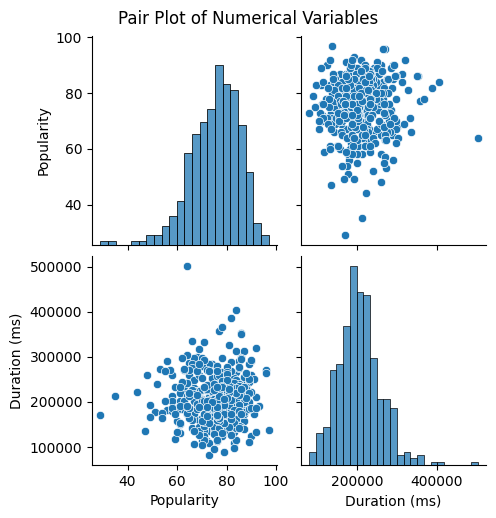

In [25]:
# Q8) Visualize relationships between multiple numerical variables simultaneously using a pair plot.

# Select relevant numerical columns for the pair plot
num_cols = ['Popularity', 'Duration (ms)']

sns.pairplot(df[num_cols])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

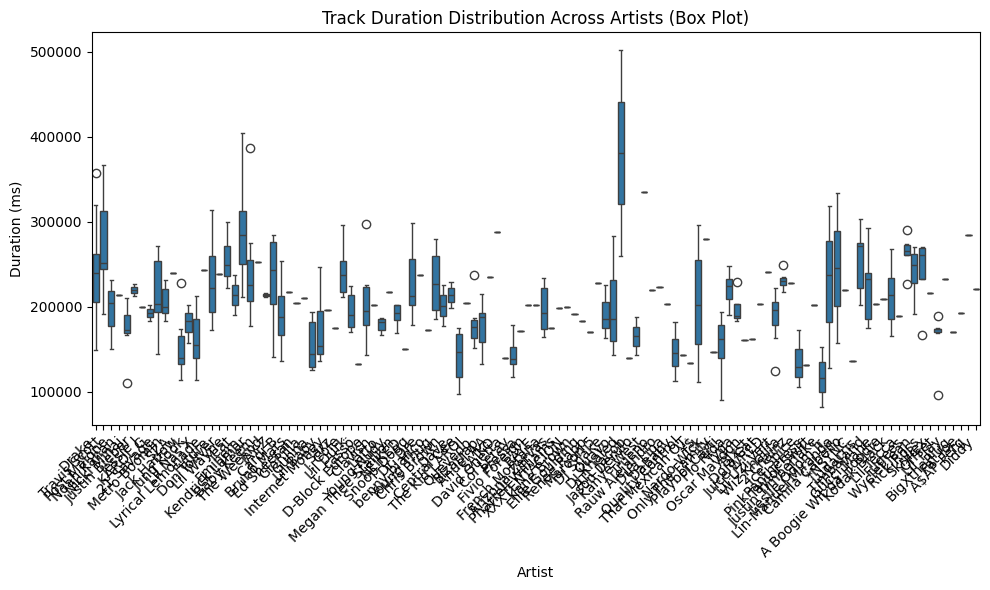

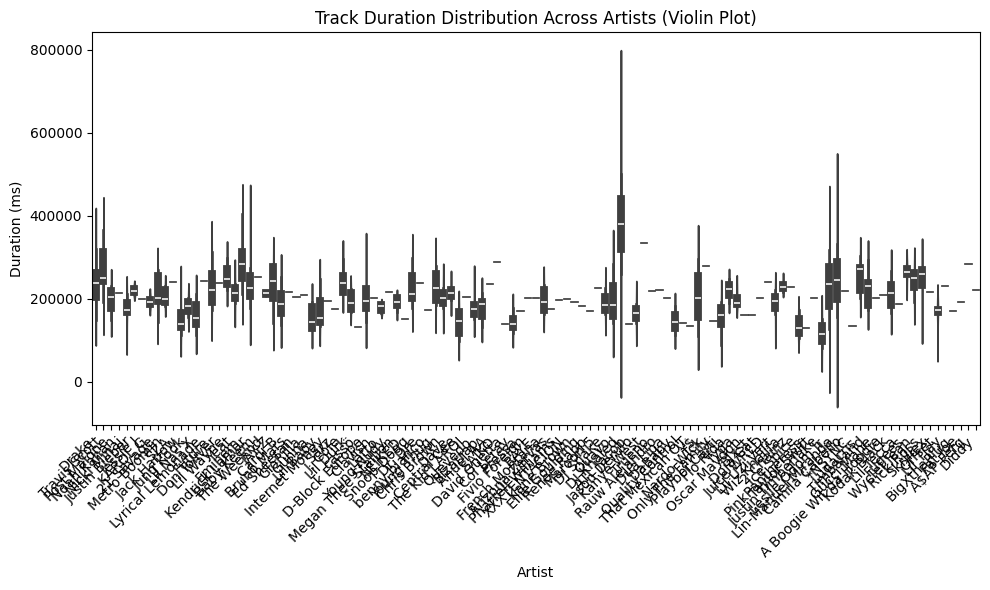

In [ ]:
# Q9) Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Artist', y='Duration (ms)')
plt.xticks(rotation=45, ha='right')
plt.title('Track Duration Distribution Across Artists (Box Plot)')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.tight_layout()
plt.show()

# Alternatively, using a violin plot for more detail:
plt.figure(figsize=(7, 4))
sns.violinplot(data=df, x='Artist', y='Duration (ms)')
plt.xticks(rotation=45, ha='right')
plt.title('Track Duration Distribution Across Artists (Violin Plot)')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.tight_layout()
plt.show()

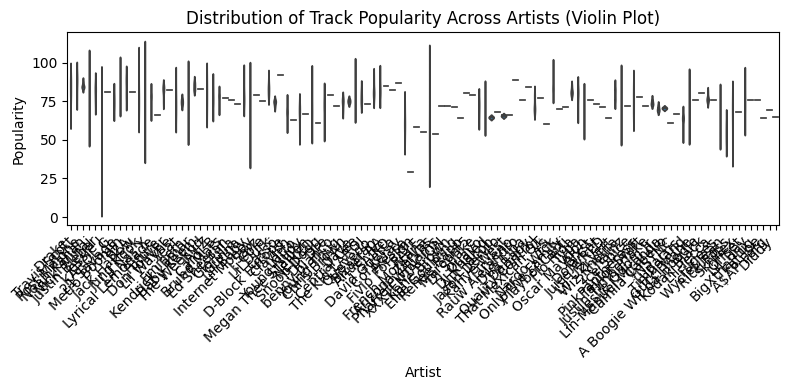

c:\Users\ANIL CHOUDHARY\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 52.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ANIL CHOUDHARY\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ANIL CHOUDHARY\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 62.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ANIL CHOUDHARY\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers 

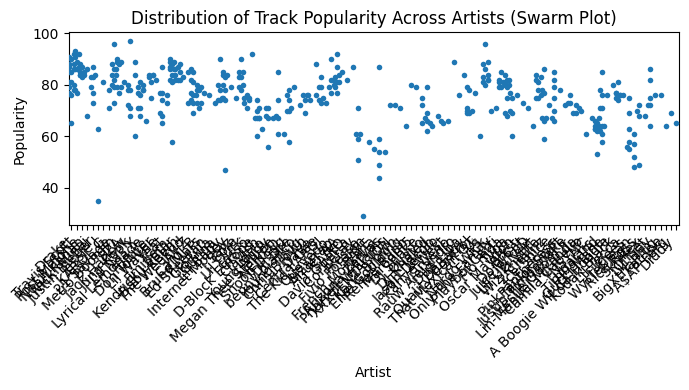

In [27]:
# Q10) How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

plt.figure(figsize=(8, 4))
sns.violinplot(data=df, x='Artist', y='Popularity', inner='quartile')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Track Popularity Across Artists (Violin Plot)')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

# Alternatively, using a swarm plot (may be slow for large datasets):
plt.figure(figsize=(7, 4))
sns.swarmplot(data=df, x='Artist', y='Popularity', size=4)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Track Popularity Across Artists (Swarm Plot)')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()